<a href="https://colab.research.google.com/github/bfelt001/deepLearningWithEEG/blob/main/deepLearnProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io

data = scipy.io.loadmat('/content/drive/MyDrive/WLDataCW.mat')
print(data.keys())
print(data['__globals__'])
data_only = data['data']
label = data['label']
print(data_only.shape)
print(label.shape)

dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])
[]
(62, 512, 360)
(1, 360)


In [6]:
#a = []
#a = label ^  1

#label2 = np.vstack([label, a])
#label2.shape

In [3]:
xp = np.array(data_only)

y = np.array(label)

columns_to_remove = slice(45, None)

# Remove columns using advanced indexing
shrunk_matrix = xp[:, np.delete(np.arange(xp.shape[1]), columns_to_remove)]

xp = shrunk_matrix

In [4]:
columns_to_remove = slice(45, None)

# Remove columns using advanced indexing
shrunk_matrix = xp[:, np.delete(np.arange(xp.shape[1]), columns_to_remove)]

xp = shrunk_matrix
print(xp.shape)

(62, 45, 360)


In [5]:
import numpy as np

# Define the sampling rate (in Hz)
sampling_rate = 256

# Define frequency bands (in Hz)
bands = [(0, 4), (4, 8), (8, 12), (12, 30), (30, 45)]

# Calculate the frequency values
n_freqs = xp.shape[1]  # number of frequency bins after cutting off at 45 Hz
freqs = np.fft.fftfreq(n_freqs, d=1/sampling_rate)

# Calculate power spectrum using FFT along the time axis (assuming xp is EEG data)
power_spectrum = np.abs(np.fft.fft(xp, axis=2))**2

# Initialize an empty array to store power bands
power_bands = np.zeros((xp.shape[0], len(bands), xp.shape[2]))

# Loop through each time step
for i in range(xp.shape[2]):
    # Loop through each frequency band
    for band_index, (low, high) in enumerate(bands):
        # Get indices corresponding to the frequency band
        freq_indices = (low <= freqs) & (freqs < high)

        # Sum power across the frequency band for the current time step
        band_power = np.sum(power_spectrum[:, :, i][:, freq_indices], axis=-1)

        # Assign band power to the corresponding index in the power_bands array
        power_bands[:, band_index, i] = band_power

concatenated_data = power_bands.reshape((power_bands.shape[2], power_bands.shape[0] * power_bands.shape[1]))
print(concatenated_data.shape)  # Output: (360, 310)


(360, 310)


In [6]:
y = y.flatten()
print(y.shape)

(360,)


In [7]:
np.random.seed(42)
permuted_indices = np.random.permutation(len(concatenated_data))

# Shuffle both arrays using the same permutation of indices
shuffled_x = concatenated_data[permuted_indices]
shuffled_y = y[permuted_indices]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(shuffled_x, shuffled_y):
    x_train_fold, x_test_fold = shuffled_x[train_index], shuffled_x[test_index]
    y_train_fold, y_test_fold = shuffled_y[train_index], shuffled_y[test_index]

In [8]:
print("x_train_fold:", x_train_fold.shape)
print("x_test_fold:", x_test_fold.shape)
print("y_train_fold:", y_train_fold.shape)
print("y_test_fold:", y_test_fold.shape)

x_train_fold: (288, 310)
x_test_fold: (72, 310)
y_train_fold: (288,)
y_test_fold: (72,)


In [9]:
from collections import Counter

# Before splitting
print("Class distribution before splitting:")
print(Counter(y))

# After splitting (within the loop)
print("Class distribution in train fold:")
print(Counter(y_train_fold))
print("Class distribution in test fold:")
print(Counter(y_test_fold))

Class distribution before splitting:
Counter({0: 180, 1: 180})
Class distribution in train fold:
Counter({1: 144, 0: 144})
Class distribution in test fold:
Counter({1: 36, 0: 36})


In [14]:
y_train_fold

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1], dtype=uint8)

In [15]:
y_test_fold

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0], dtype=uint8)

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def logisticRegression(x, y, max_iter=3000, loss_threshold=0.0001):
    # Define weights matrix
    WX, num_features = x.shape
    WY = 1  # Output dimension for binary classification
    w = np.zeros((num_features, WY))

    # Define learning rate and regularization parameter
    learnRate = 0.0001
    lmbda = 0.01

    # Define bias
    b = 0  # Scalar value for the bias

    losses = []
    accuracies = []

    for epoch in range(max_iter):
        yHat = np.dot(x, w) + b
        yHat = np.clip(yHat, -10, 10)  # Clip logits to prevent overflow
        sigmoid = 1 / (1 + np.exp(-yHat))
        sigmoid = np.clip(sigmoid, 1e-9, 1 - 1e-9)  # Clip sigmoid to prevent overflow/underflow in log

        # Calculate loss
        loss = (-1/x.shape[0]) * np.sum(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid)) + (lmbda / (2 * x.shape[0])) * np.sum(w ** 2)

        # Store loss and accuracy
        losses.append(loss)


        # Calculate gradients
        wDerive = (1/x.shape[0]) * np.dot(x.T, (sigmoid - y[:, np.newaxis])) + (lmbda / x.shape[0]) * w
        bDerive = (1/x.shape[0]) * np.sum(sigmoid - y)

        # Update weights and bias
        w = np.subtract(w, learnRate * wDerive)
        b = b - learnRate * bDerive

        # Print loss for monitoring
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")


        # Early stopping condition
        if loss < loss_threshold:
            print(f"Converged at epoch {epoch} with loss {loss:.4f}")
            break


    # Plot training and test loss
    plt.plot(losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return w, b, losses, accuracies

Epoch 0: Loss = 199.6264
Epoch 100: Loss = 1441.9567
Epoch 200: Loss = 1442.7600
Epoch 300: Loss = 1443.7140
Epoch 400: Loss = 1444.2805
Epoch 500: Loss = 1444.8148
Epoch 600: Loss = 1445.3057
Epoch 700: Loss = 1445.9044
Epoch 800: Loss = 1445.9723
Epoch 900: Loss = 1446.3279
Epoch 1000: Loss = 1446.5198
Epoch 1100: Loss = 1447.0398
Epoch 1200: Loss = 1447.0608
Epoch 1300: Loss = 1447.0616
Epoch 1400: Loss = 1447.0624
Epoch 1500: Loss = 1447.0632
Epoch 1600: Loss = 1447.0640
Epoch 1700: Loss = 1447.0648
Epoch 1800: Loss = 1447.0656
Epoch 1900: Loss = 1447.0664
Epoch 2000: Loss = 1447.0672
Epoch 2100: Loss = 1447.0680
Epoch 2200: Loss = 1447.0688
Epoch 2300: Loss = 1447.0696
Epoch 2400: Loss = 1447.0704
Epoch 2500: Loss = 1447.0712
Epoch 2600: Loss = 1447.0720
Epoch 2700: Loss = 1447.0728
Epoch 2800: Loss = 1447.0736
Epoch 2900: Loss = 1447.0744


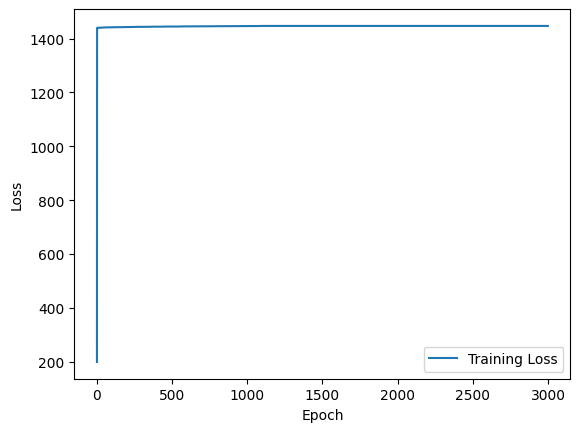

0.4166666666666667


In [11]:
from sklearn.metrics import accuracy_score
from scipy.special import expit

# Train the logistic regression model
w, b,*_  = logisticRegression(x_train_fold, y_train_fold)

# Make predictions on the test data
y_pred = expit(np.dot(x_test_fold, w) + b)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class = y_pred_class.flatten()

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test_fold, y_pred_class)

print(accuracy)


In [12]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.models import resnet50



In [31]:
x_tensor = torch.tensor(x_train_fold, dtype=torch.float32)
y_tensor = torch.tensor(y_train_fold, dtype=torch.float32)
y_tensor = y_tensor.unsqueeze(1)
xtest = torch.tensor(x_test_fold, dtype=torch.float32)
ytest = torch.tensor(y_test_fold, dtype=torch.float32)

In [32]:
x_tensor.shape

torch.Size([288, 310])

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        logits = self.linear(x)
        output = self.sigmoid(logits)
        return output



In [29]:
# Assuming x and y are your input features and labels, respectively


# Define input dimension (number of features)
input_dim = x_tensor.shape[1]

# Create a logistic regression model
model = LogisticRegression(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.000001, weight_decay=0.001, momentum=0.5)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)

    # Compute loss
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 51.3889
Epoch [2/100], Loss: 51.3889
Epoch [3/100], Loss: 51.3889
Epoch [4/100], Loss: 51.3889
Epoch [5/100], Loss: 51.3889
Epoch [6/100], Loss: 51.3889
Epoch [7/100], Loss: 51.3889
Epoch [8/100], Loss: 51.3889
Epoch [9/100], Loss: 51.3889
Epoch [10/100], Loss: 51.3889
Epoch [11/100], Loss: 51.3889
Epoch [12/100], Loss: 51.3889
Epoch [13/100], Loss: 51.3889
Epoch [14/100], Loss: 51.3889
Epoch [15/100], Loss: 51.3889
Epoch [16/100], Loss: 51.3889
Epoch [17/100], Loss: 51.3889
Epoch [18/100], Loss: 51.3889
Epoch [19/100], Loss: 51.3889
Epoch [20/100], Loss: 51.3889
Epoch [21/100], Loss: 51.3889
Epoch [22/100], Loss: 51.3889
Epoch [23/100], Loss: 51.3889
Epoch [24/100], Loss: 51.3889
Epoch [25/100], Loss: 51.3889
Epoch [26/100], Loss: 51.3889
Epoch [27/100], Loss: 51.3889
Epoch [28/100], Loss: 51.3889
Epoch [29/100], Loss: 51.3889
Epoch [30/100], Loss: 51.3889
Epoch [31/100], Loss: 51.3889
Epoch [32/100], Loss: 51.3889
Epoch [33/100], Loss: 51.3889
Epoch [34/100], Los

In [35]:
y_pred = model(xtest)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(ytest, torch.round(y_pred.detach()).numpy())
precision = precision_score(ytest, torch.round(y_pred.detach()).numpy())
recall = recall_score(ytest, torch.round(y_pred.detach()).numpy())
f1 = f1_score(ytest, torch.round(y_pred.detach()).numpy())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.5278
Precision: 0.5833
Recall: 0.1944
F1-Score: 0.2917


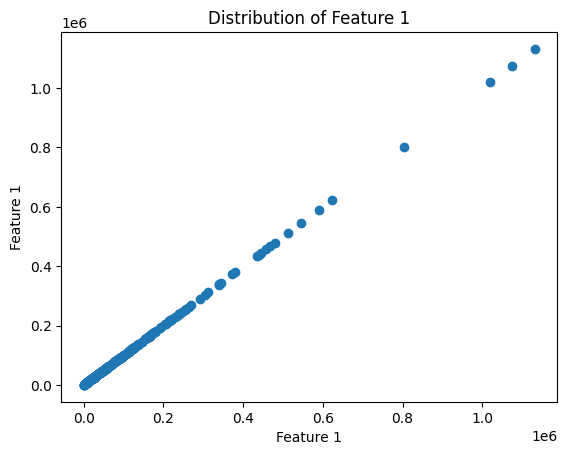

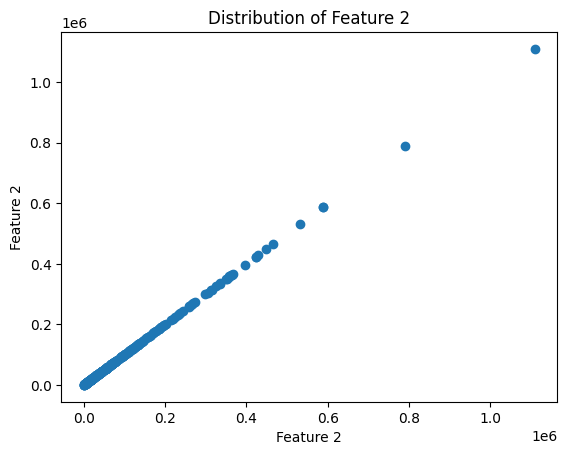

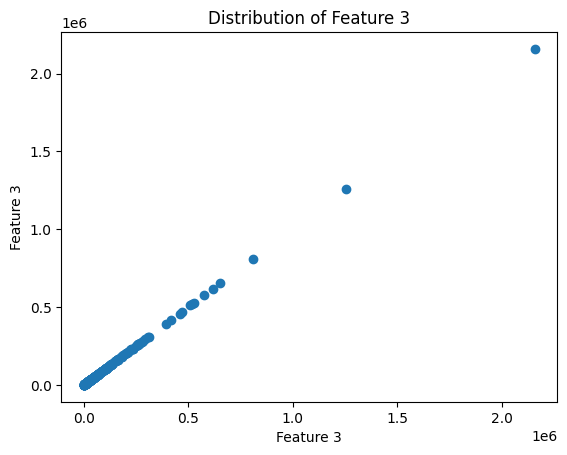

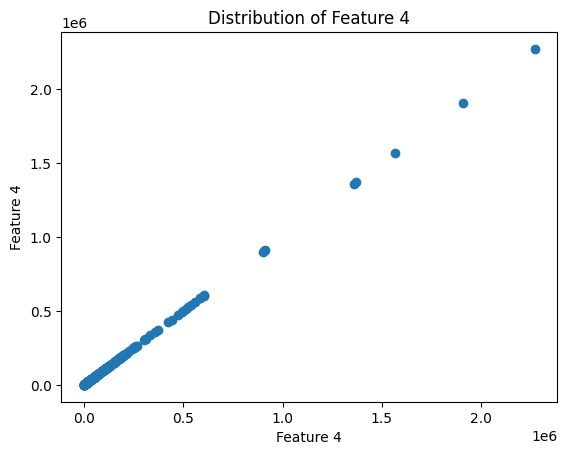

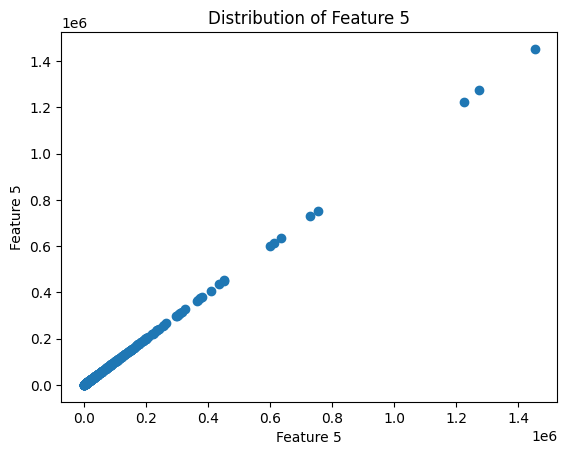

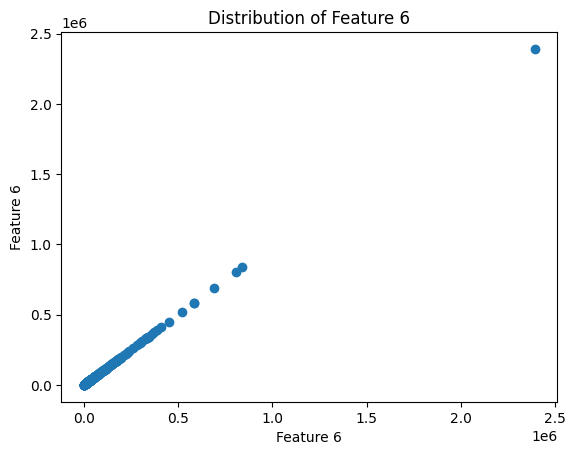

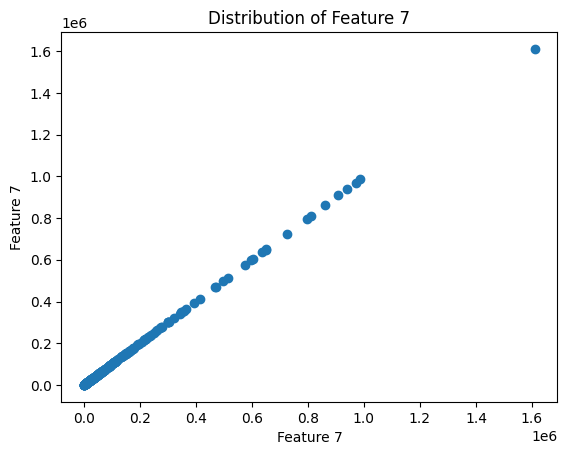

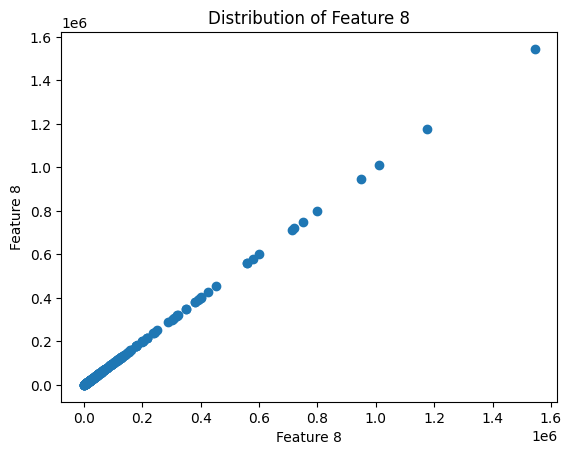

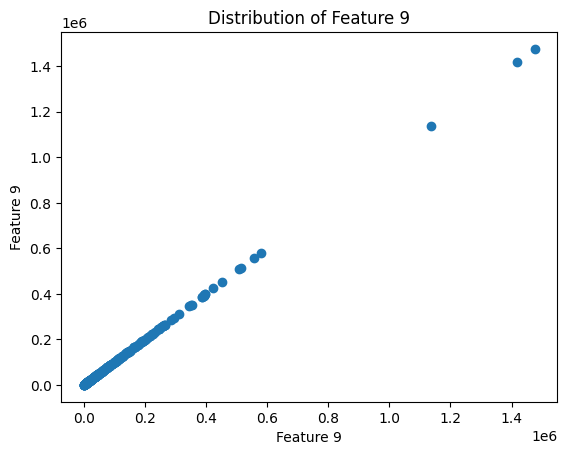

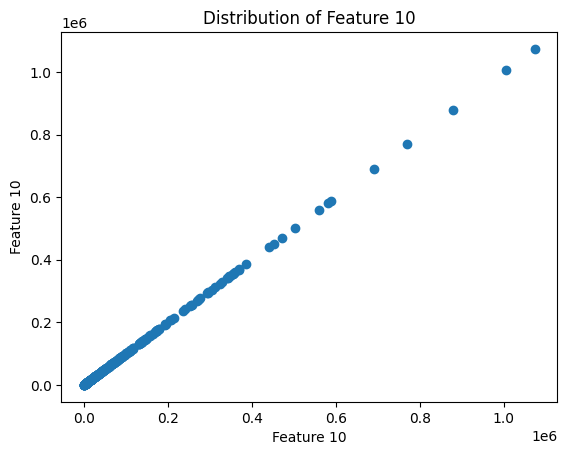

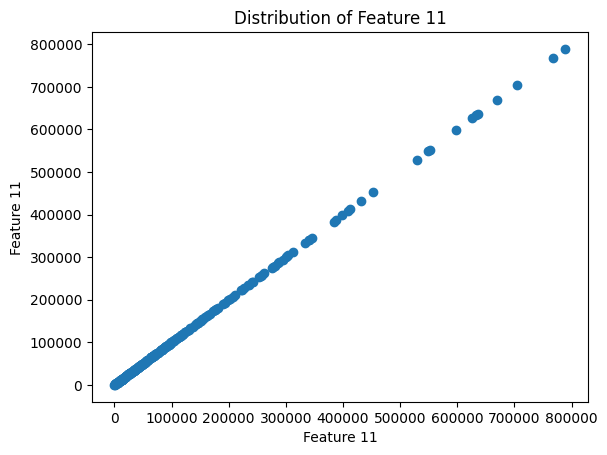

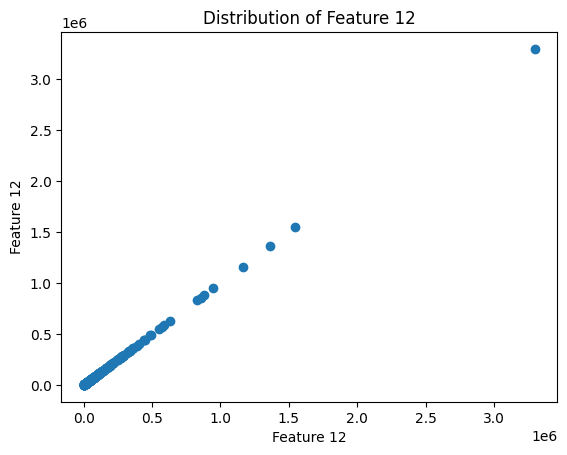

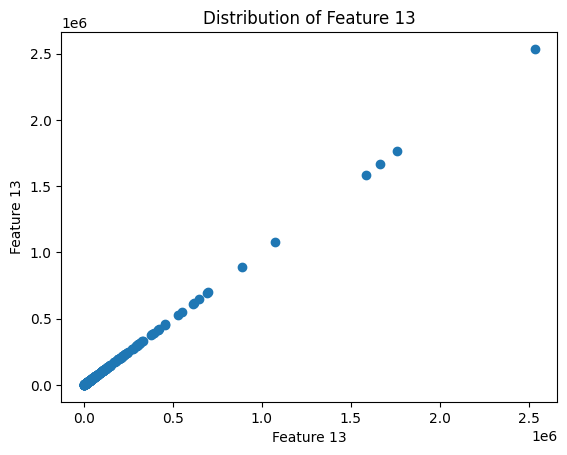

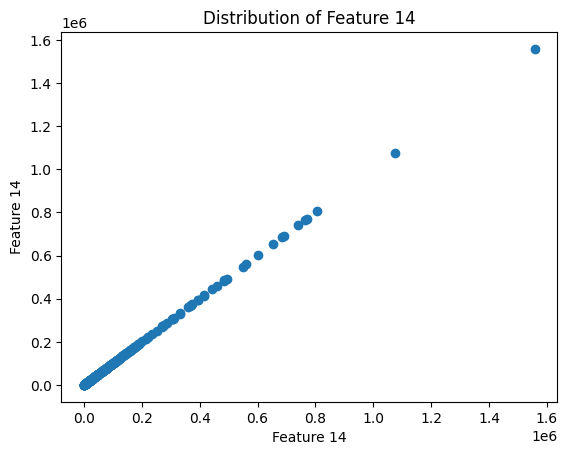

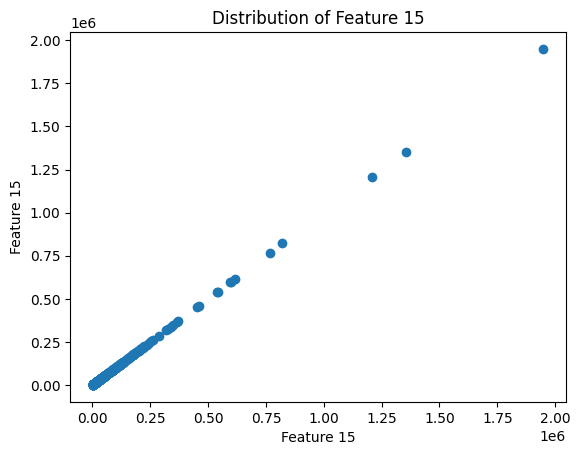

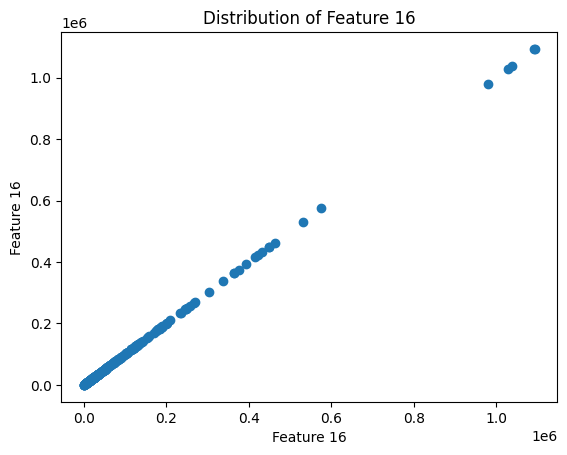

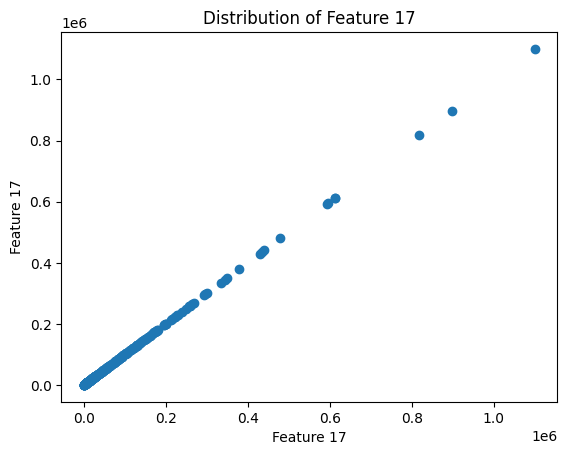

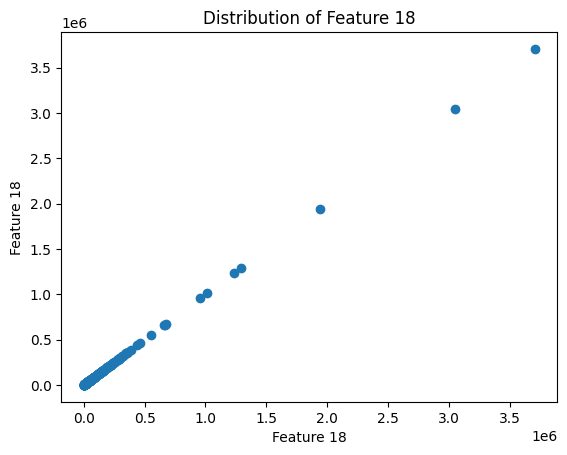

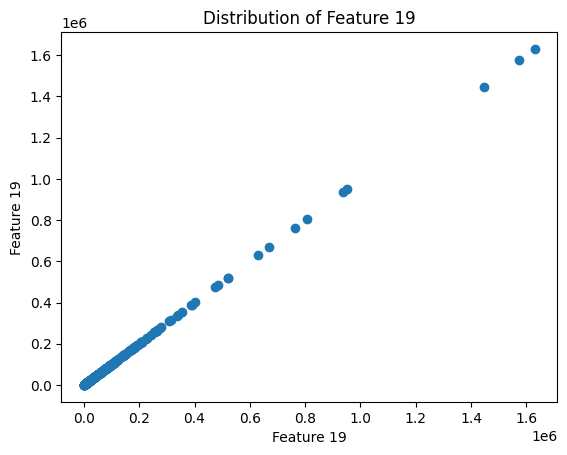

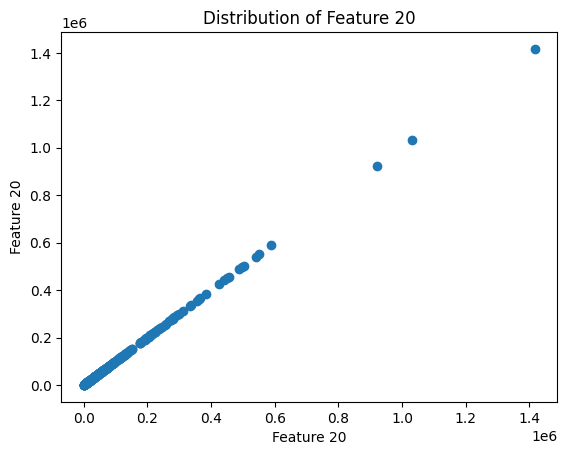

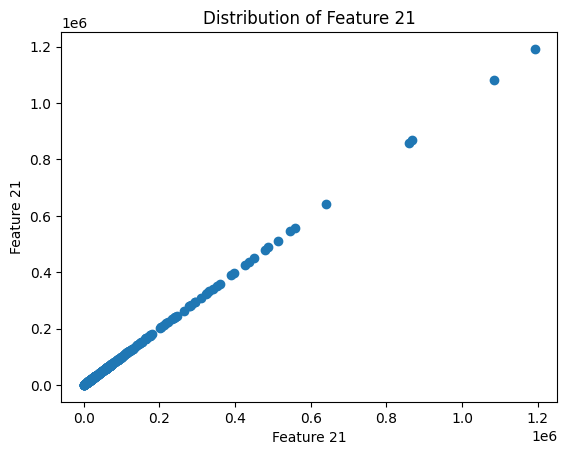

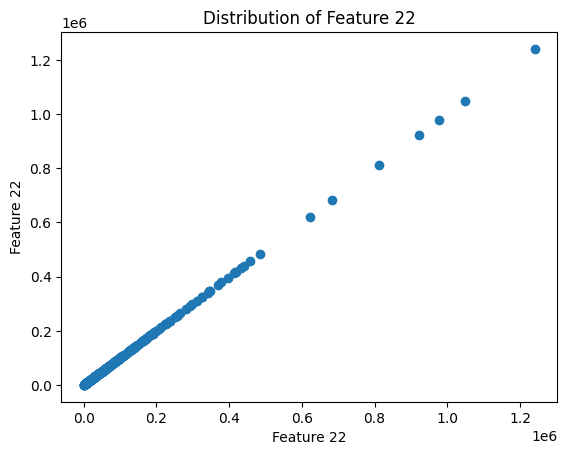

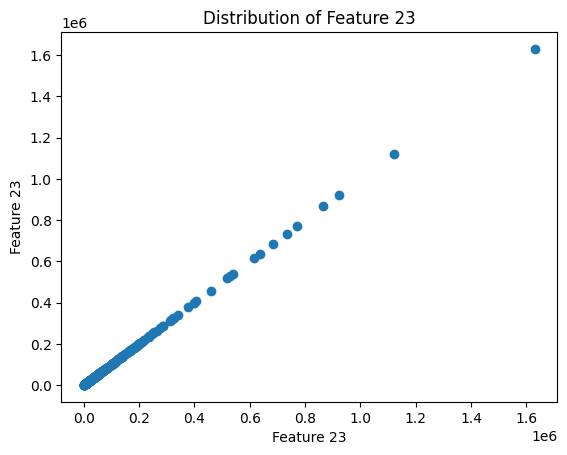

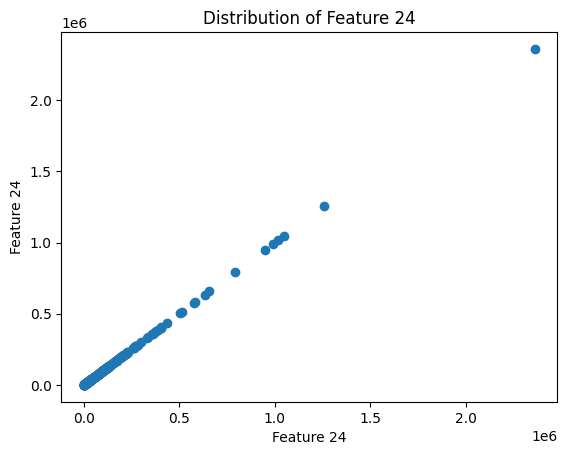

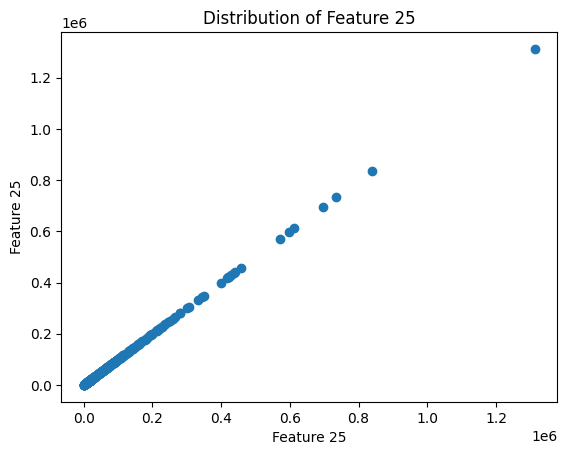

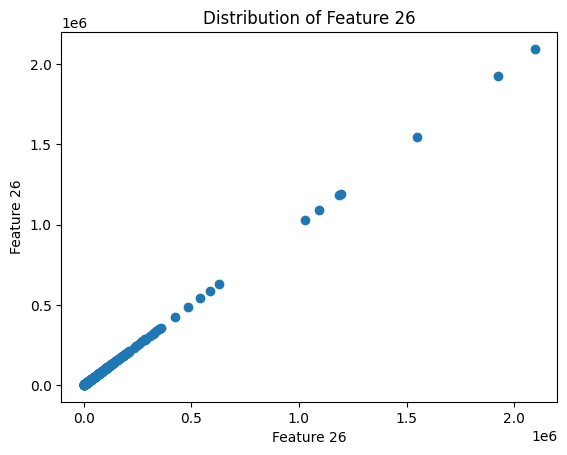

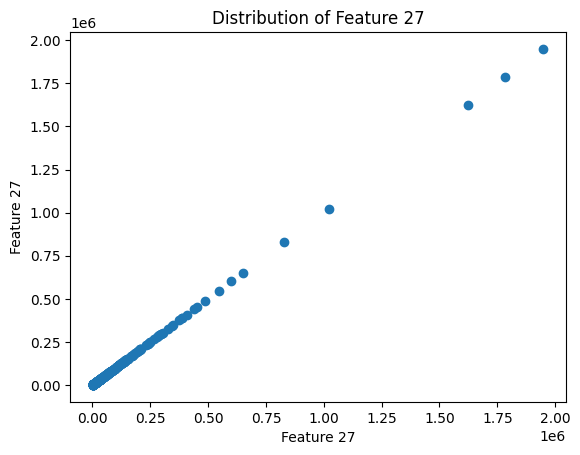

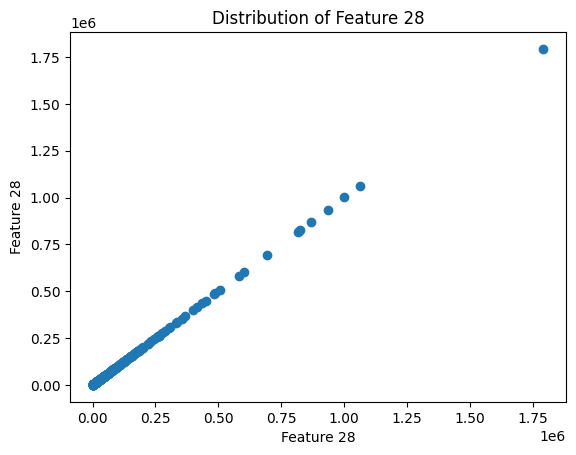

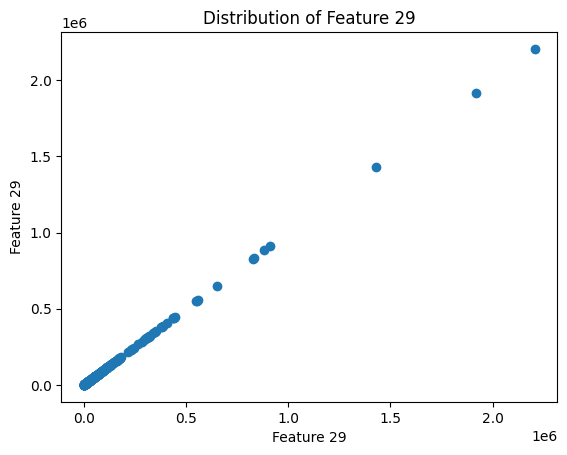

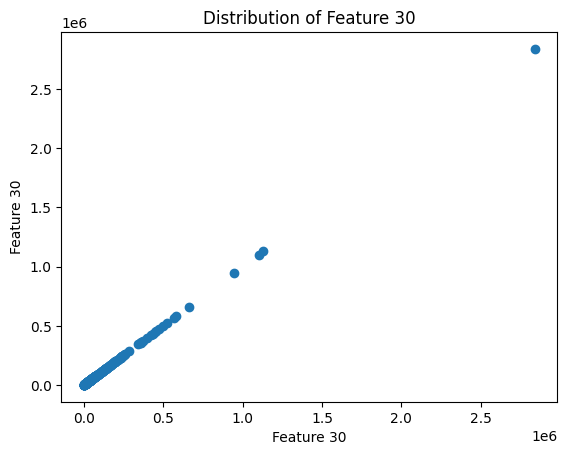

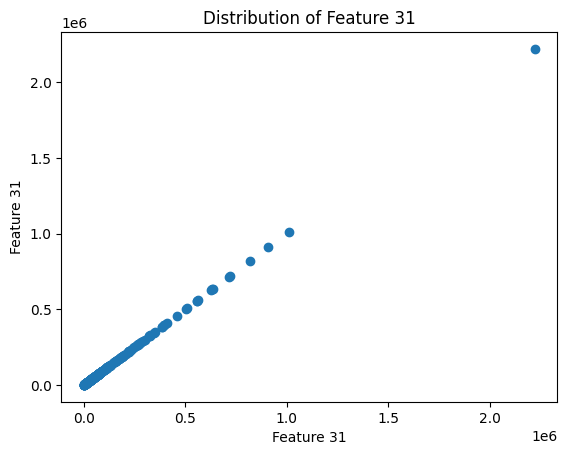

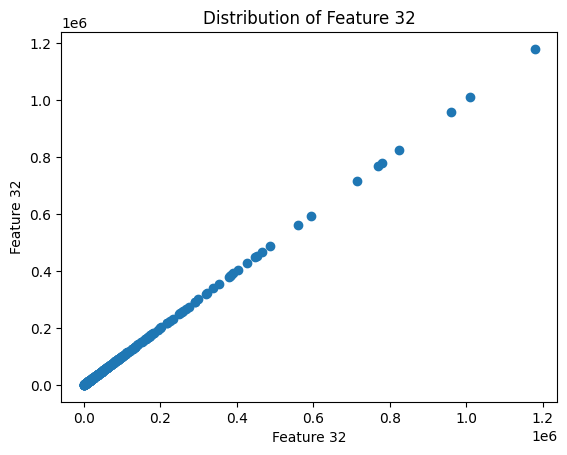

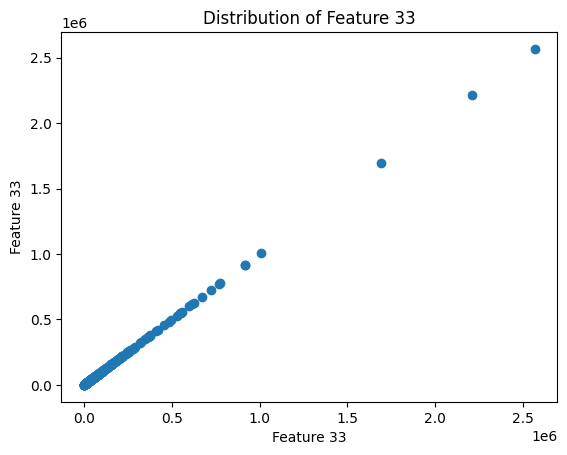

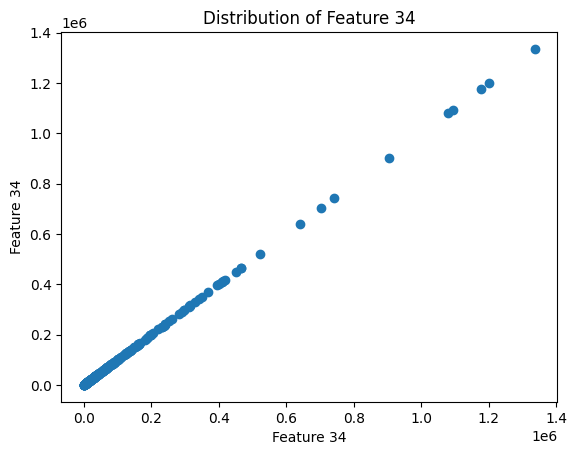

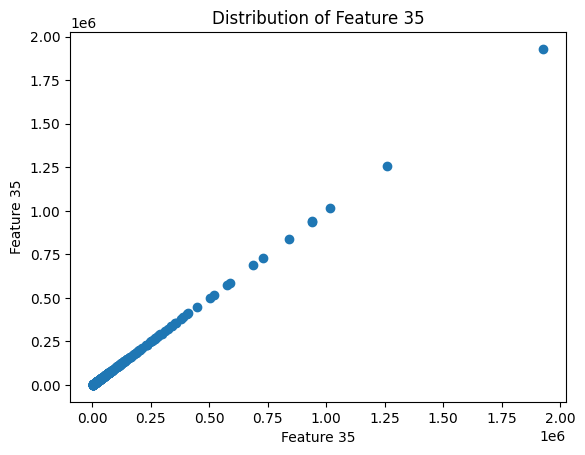

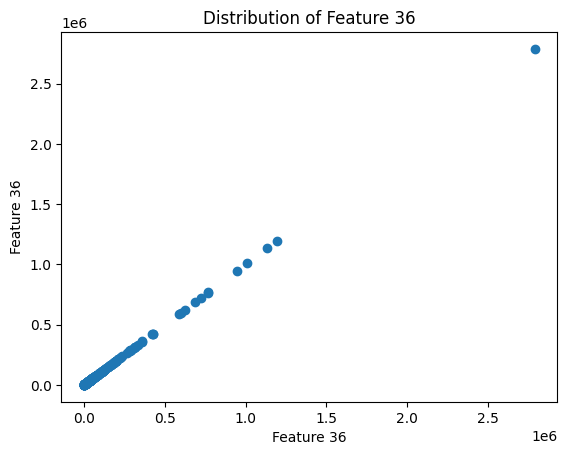

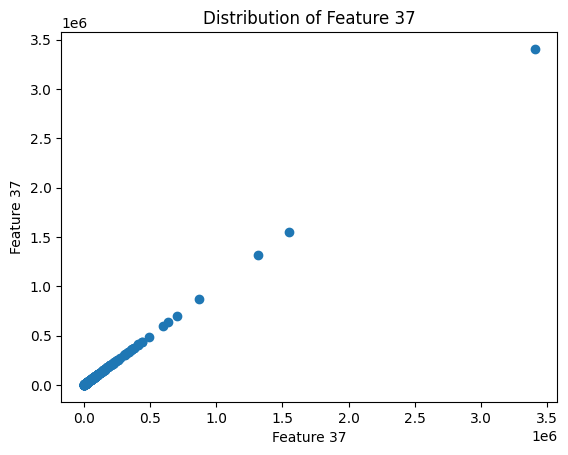

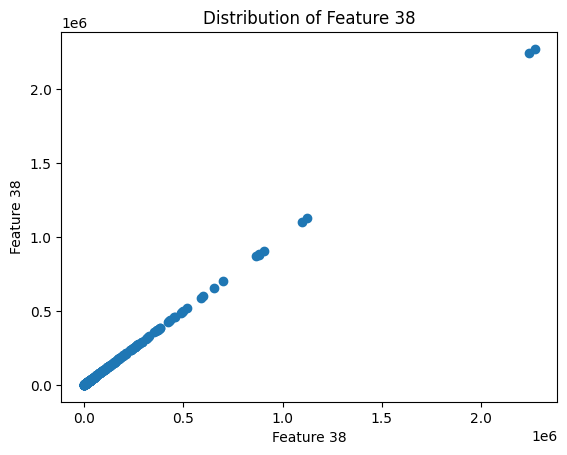

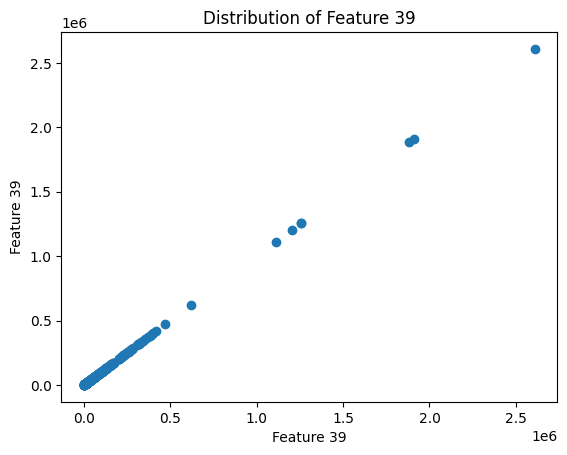

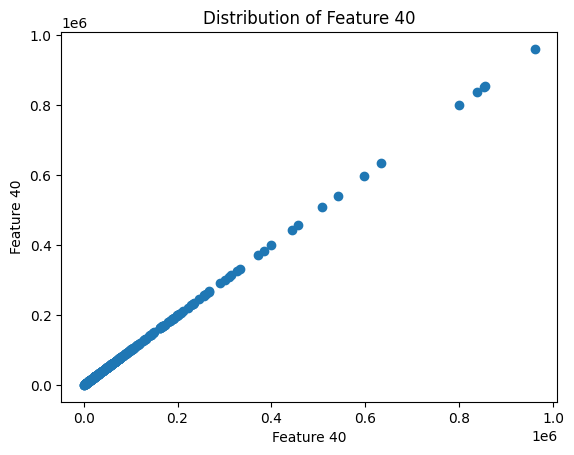

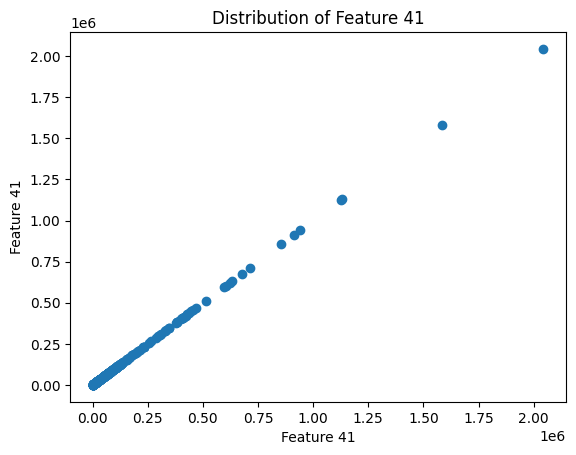

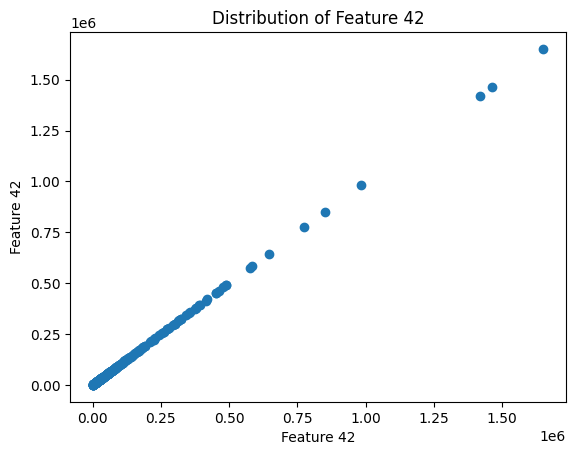

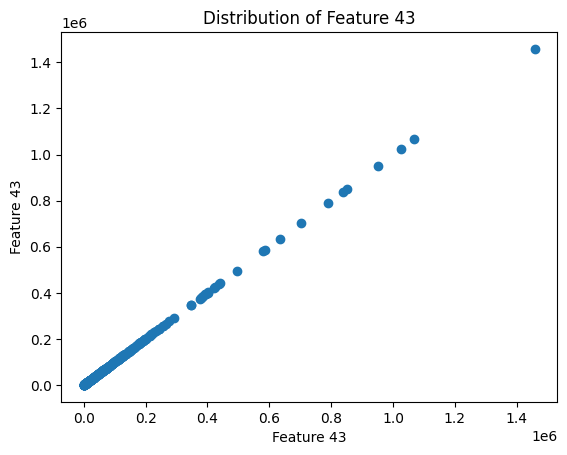

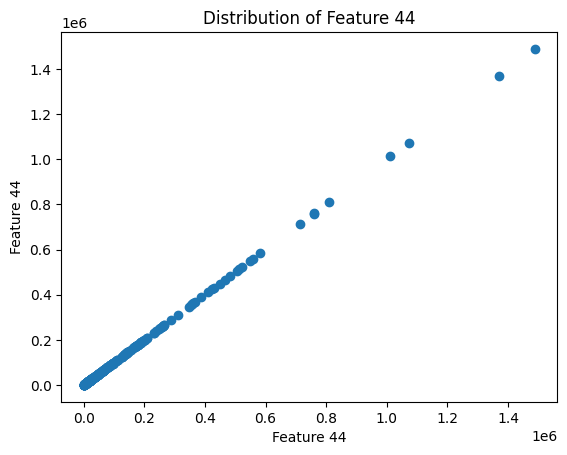

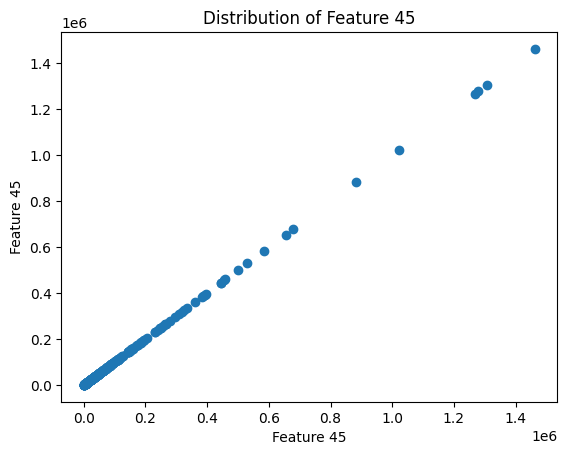

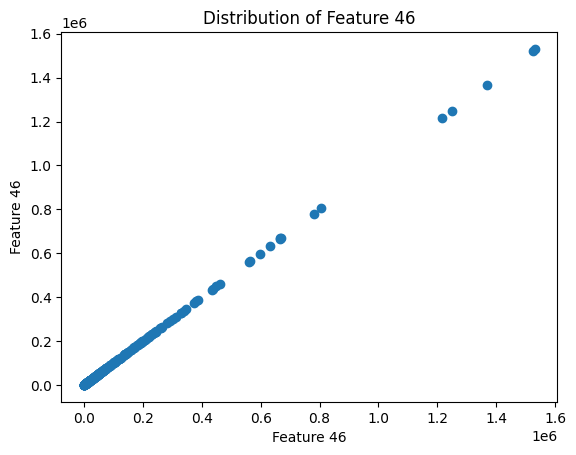

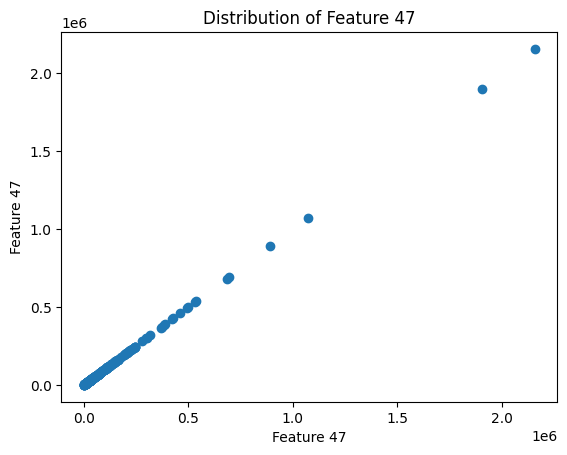

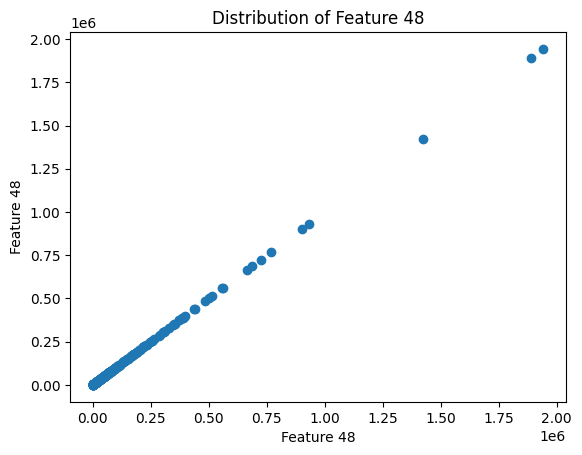

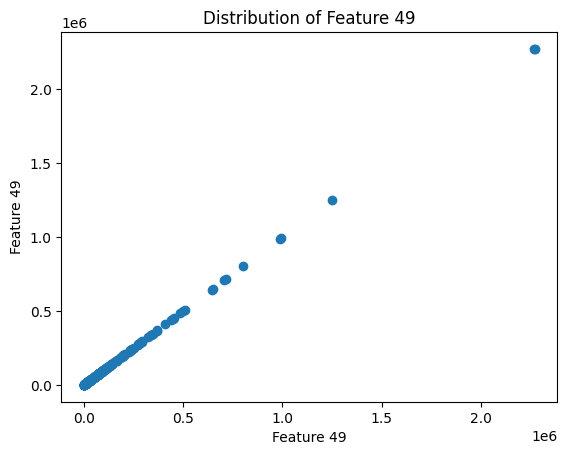

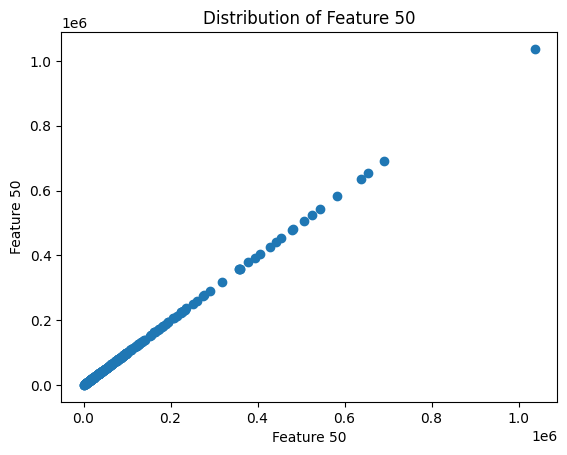

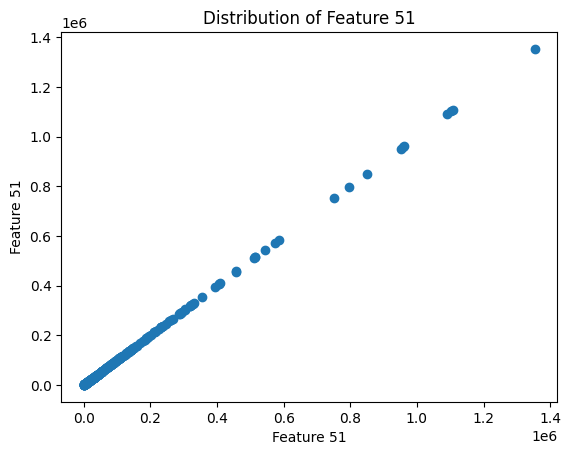

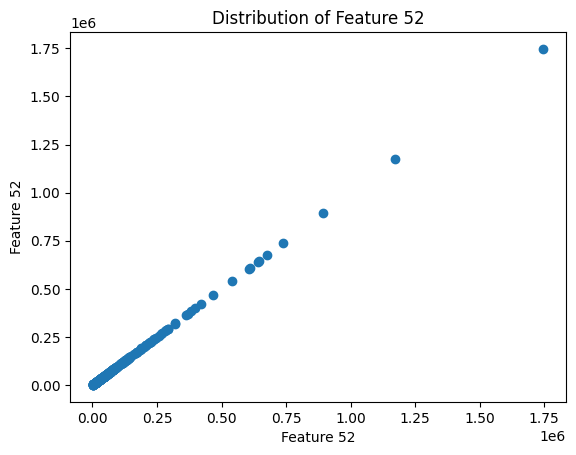

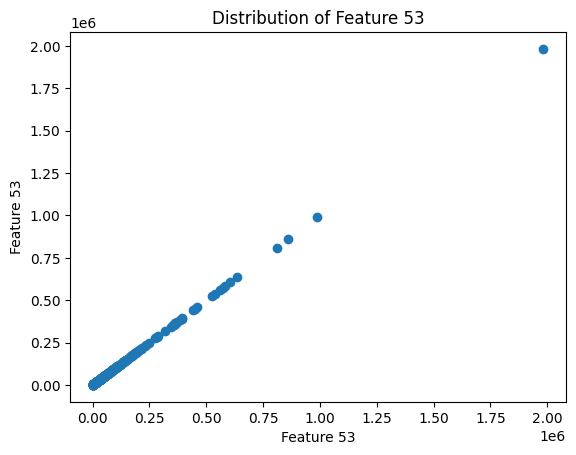

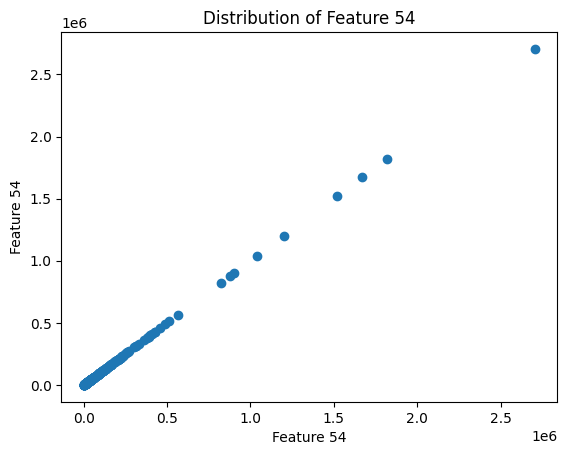

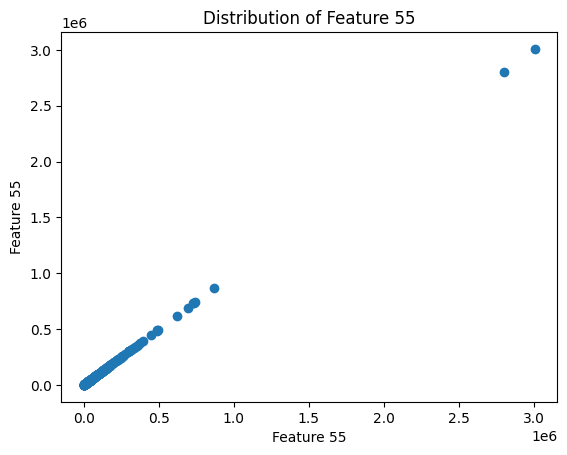

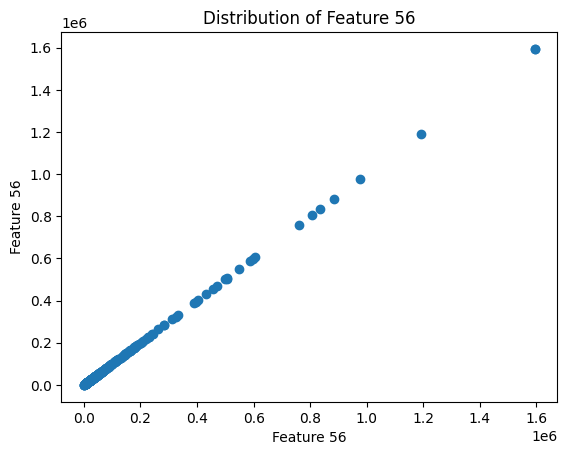

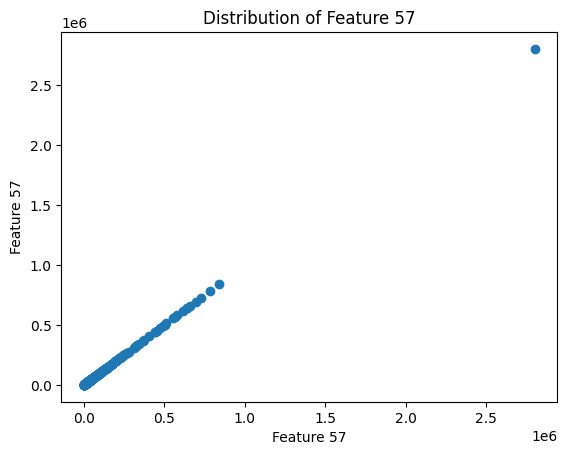

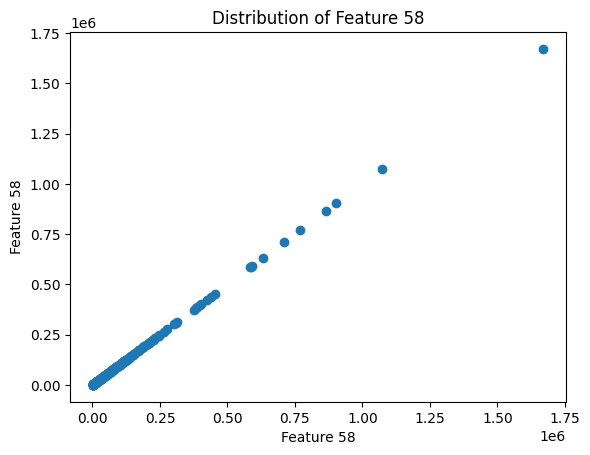

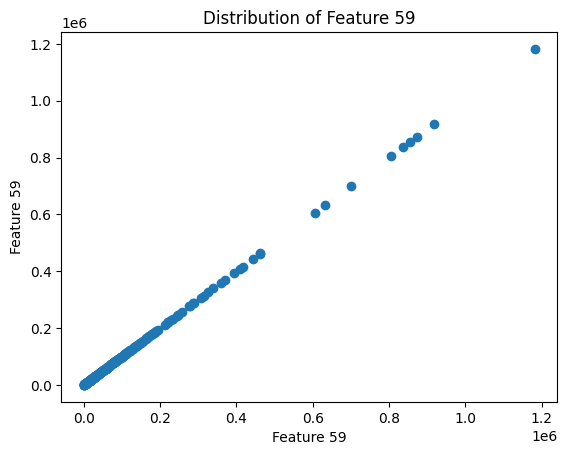

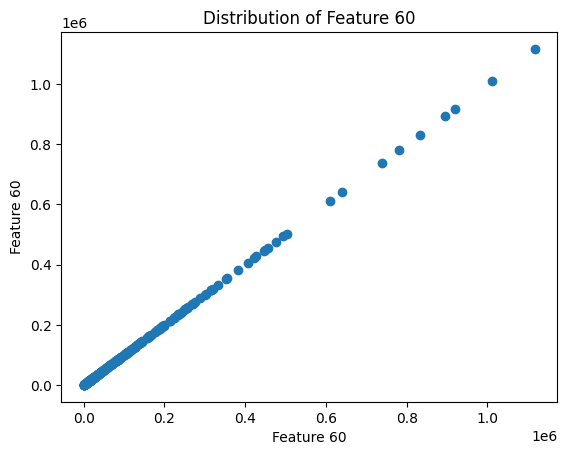

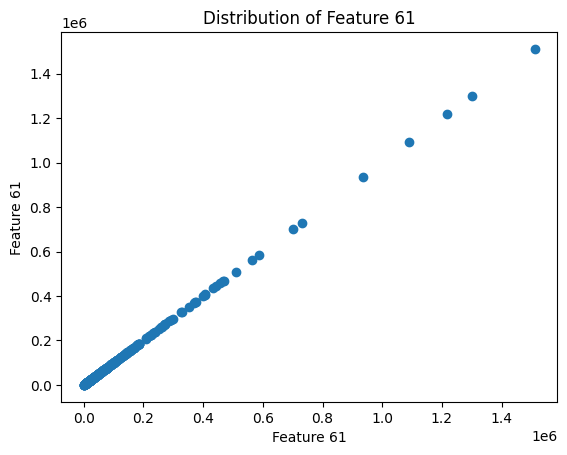

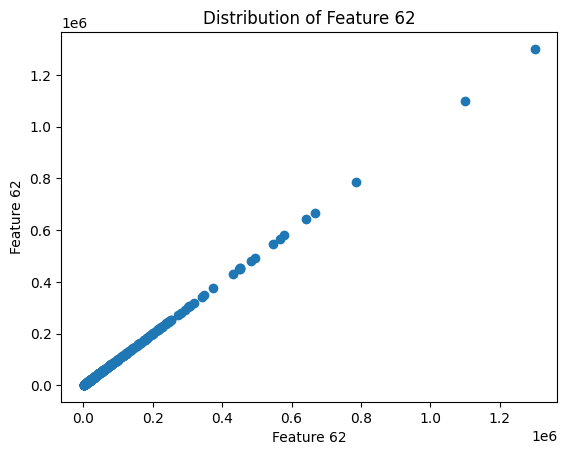

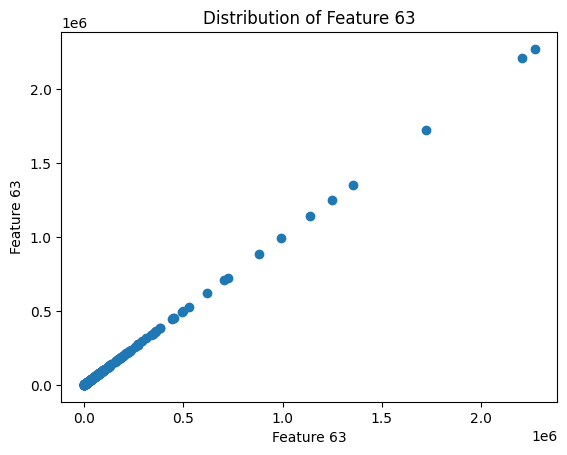

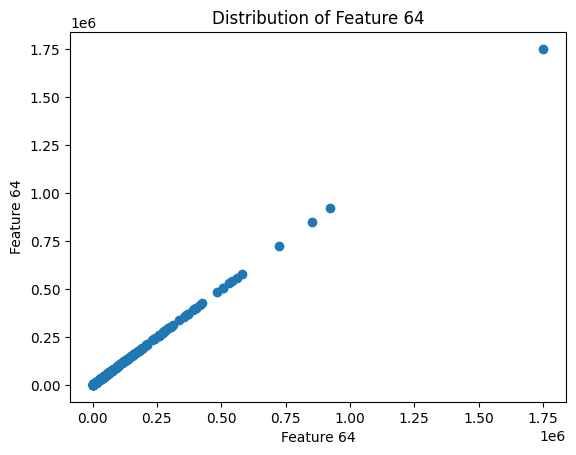

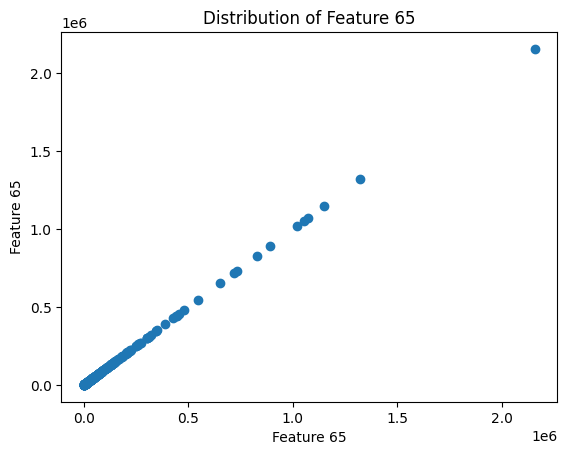

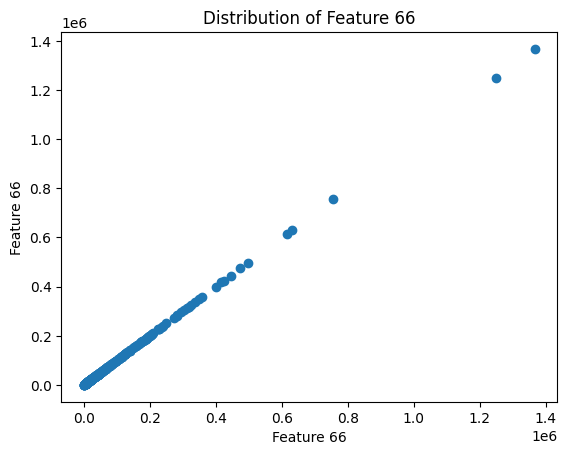

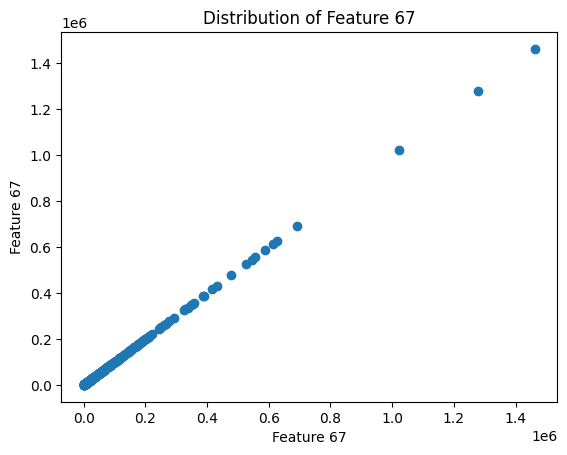

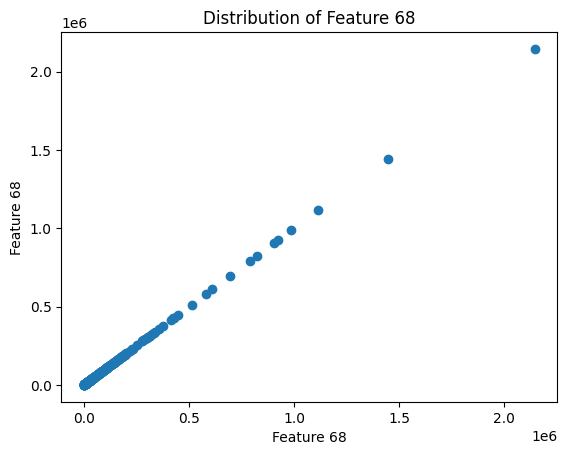

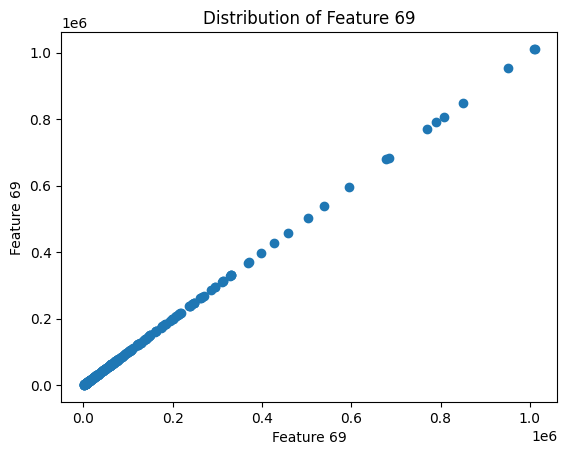

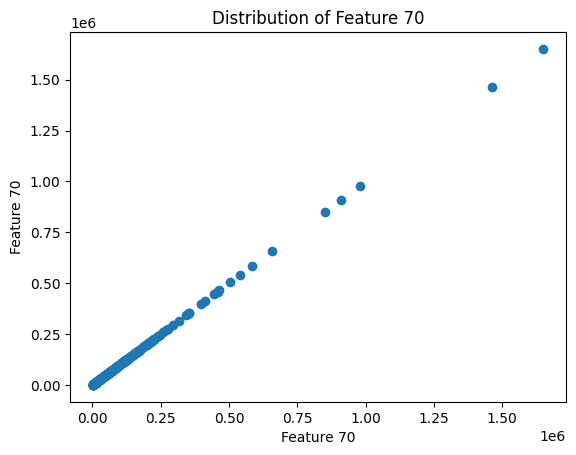

KeyboardInterrupt: 

In [30]:
import matplotlib.pyplot as plt
# Assuming x_tensor has shape (num_samples, 2) for 2D features
x_data = x_tensor.numpy()  # Convert to numpy array for plotting
y_data = y_tensor.numpy().flatten()  # Flatten y if it has multiple dimensions

# Assuming x_data has shape (num_samples, 2)
num_features = x_data.shape[1]
for i in range(num_features):
  plt.figure()
  plt.scatter(x_data[:, i], x_data[:, i])  # Plot each feature vs itself
  plt.xlabel(f"Feature {i+1}")
  plt.ylabel(f"Feature {i+1}")
  plt.title(f"Distribution of Feature {i+1}")
  plt.show()

for i in range(num_features):
  plt.figure()
  plt.scatter(x_data[:, i], y_data)
  plt.xlabel(f"Feature {i+1}")
  plt.ylabel("Target Label")
  plt.title(f"Feature {i+1} vs Target Label")
  plt.show()


In [22]:
#!pip install braindecode



In [25]:
!pip install mne
import mne
from braindecode.models import EEGConformer
from skorch.dataset import ValidSplit
from braindecode import EEGClassifier

X = concatenated_data


#n_channels = X[1]
#ch_names = ["ch" + str(i + 1) for i in range(len(X[1]))]
#sfreq = 45  # Sampling rate in Hz
#info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=["eeg"] * n_channels)


ModuleNotFoundError: No module named 'mne'

In [24]:
X = X.reshape(X.shape[0], X.shape[2], X.shape[1])
X = torch.tensor(X, dtype=torch.float32)

NameError: name 'X' is not defined

In [ ]:
X = torch.tensor(xp, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
"""
Main CCN model that can achieve a mean accuracy of 17% for 10-class classification.
"""

import torch
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, num_classes=1, dropout=0.0):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
           nn.ZeroPad2d((15, 15, 0, 0)),
           nn.Conv2d(in_channels=45, out_channels=20, kernel_size=(1, 31), stride=(1, 1), padding=0),
           nn.LeakyReLU(),
           nn.Dropout(p=dropout))
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=40, kernel_size=(2, 1), stride=(2, 1), padding=(0, 1)),
            nn.BatchNorm2d(40, affine=False),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size = (1,3), stride = (1,2))
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=40, out_channels=80, kernel_size=(1, 1), stride=(1, 1), padding=(0, 1)),
            nn.LeakyReLU(),
            nn.Dropout(p=dropout))
        self.pool2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(1,2), stride=(1,2)))
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=80, out_channels=160, kernel_size=(1, 1), stride=(1, 1)),
            nn.BatchNorm2d(160, affine=False),
            nn.LeakyReLU(),
            nn.Dropout(p=dropout))
        self.pool3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 1)) )
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels = 160, out_channels = 160, kernel_size = (7,1), stride=(7,1)),
            nn.BatchNorm2d(160, affine=False),
            nn.LeakyReLU())
        self.pool4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 1)))
        self.linear1 = nn.Sequential(
            nn.Linear(4000, num_classes),  # Adjust in_features
            nn.LogSoftmax()
)


    def forward(self, x):
        #print("input: ", x[0].shape)
        out = self.layer1(x)
        #print("layer1: ",out[0].shape)
        out = self.layer2(out)
        #print("layer2: ",out[0].shape)
        out= self.layer3(out)
        #print("layer3: ",out[0].shape)
        out = self.pool2(out)
        #print("pool2: ",out[0].shape)
        out = self.layer4(out)
        #print("layer4: ",out[0].shape)
        out = self.pool3(out)
        #print("pool3: ",out[0].shape)
        out = self.layer5(out)  # Output shape might be different now
        out = torch.flatten(out, start_dim=1)
        print("Flattened shape:", out.shape)
        out= self.linear1(out)
        return out

In [ ]:

model = ConvNet(num_classes=2, dropout=0.2)

In [ ]:

# Assuming your data is a 3D tensor named 'data'
data = torch.tensor(xp, dtype=torch.float32)

# Define your batch size
batch_size = 16  # Example batch size

# Reshape the data to include the batch size
data = data.unsqueeze(0).expand(batch_size, -1, -1, -1)

In [ ]:
import torch

def calculate_accuracy(output, target):
    """Calculates the accuracy between predicted and target labels.

    Args:
        output: The model's output tensor (e.g., shape (batch_size, num_classes)).
        target: The ground truth labels tensor (e.g., shape (batch_size,)).

    Returns:
        The accuracy as a float.
    """

    predicted_classes = torch.argmax(output, dim=1)  # Get predicted class indices
    correct_predictions = (predicted_classes == target).sum().item()  # Count correct predictions
    accuracy = correct_predictions / len(target)  # Calculate accuracy

    return accuracy

In [ ]:
X = X.unsqueeze(0).expand(1, -1, -1, -1) # Permute dimensions to get (1, 310, 360)

print(X.shape)
print(y.shape)

In [ ]:
#is:1, 62, 45, 360. should be: (channels, timesteps, samples, 1)
X = X.reshape(X.shape[1], X.shape[2], X.shape[3], X.shape[0])
X.shape

In [ ]:
y = y.squeeze(1)

In [ ]:
# Assuming you have a data loader 'dataloader', model 'model',
# loss function 'loss_function', and optimizer 'optimizer'

batch_size = 62  # Adjust batch size as needed
optimizer = torch.optim.Adam(model.parameters())
loss_function = torch.nn.MSELoss()
num_batches = X.shape[0] // batch_size  # Calculate number of batches

for epoch in range(10):
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size

        batch_data = X[start_idx:end_idx]
        batch_target = y[start_idx:end_idx]
        # Forward pass
        model = ConvNet()
        output = model(X)

        loss = loss_function(output, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(output.shape)

        # ... (Print training progress or perform other actions) ...
        accuracy = calculate_accuracy(output, y)

        # Print the accuracy (e.g., after each epoch)
        if batch_idx == num_batches - 1:  # Check if it's the last batch of the epoch
            print(f"Epoch {epoch}: Accuracy = {accuracy}")

In [ ]:
for batch_idx, batch in enumerate(dataloader):
    print(batch)

In [ ]:
!pip install my_dataset_module

In [ ]:
#([16, 22320, 45])
flattened_data = X.view(data.shape[0], data.shape[1] * data.shape[3], data.shape[2])
flattened_data.shape

In [ ]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        if x.dim() == 4:
          x = x.squeeze(0)
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model = LSTMModel(input_size=62, hidden_size=128, num_layers=1, num_classes=2)


In [ ]:
#( channels, timesteps, features)
X = torch.tensor(xp, dtype=torch.float32)


In [ ]:
X = X.reshape(X.shape[2], X.shape[1], -1)
X.shape

In [ ]:
X = X.unsqueeze(0)

In [ ]:
y = torch.tensor(y, dtype=torch.float32)
y.shape

In [ ]:
X.shape, y.shape

In [ ]:
import torch

def evaluate(model, dataloader):
    """Evaluates the model on the test set.

    Args:
        model: The trained model.
        dataloader: The test data loader.

    Returns:
        A tuple containing the test loss and accuracy.
    """

    model.eval()  # Set model to evaluation mode

    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for data, target in dataloader:
            target = target.long()  # Convert target labels to Long

            output = model(data)
            loss = loss_function(output, target)  # Calculate loss

            total_loss += loss.item() * data.size(0)  # Accumulate loss
            predicted_classes = torch.argmax(output, dim=1)
            total_correct += (predicted_classes == target).sum().item()  # Count correct predictions
            total_samples += data.size(0)  # Count total samples

    avg_loss = total_loss / total_samples
    accuracy = total_correct / total_samples

    return avg_loss, accuracy

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Reshape data to add a new dimension for sequence length
        return self.data[idx].unsqueeze(0), self.labels[idx]

# Create the dataset
dataset = MyDataset(X, y)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split
from torch import optim

# Assuming you have your data and labels in 'X' and 'y'
from torch.utils.data import random_split
train_losses = []
test_losses = []
test_accuracies = []
# Assuming you have your data and labels in 'X' and 'y'
y = y.long()

# Concatenate your data and labels into a single dataset
dataset = TensorDataset(X, y)

# Calculate the sizes of the train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Shuffle the indices and split the dataset
indices = torch.randperm(len(dataset))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Create shuffled train and test datasets
train_dataset = torch.utils.data.Subset(dataset, train_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)

# Create data loaders for the train and test sets
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
# Define the loss function (neg Loss)
loss_function = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(2):
    for batch_idx, (data, target) in enumerate(train_dataloader):
        # Forward pass
        output = model(data)
        loss = loss_function(output, target.long())  # Calculate Cross-Entropy Loss
        train_losses.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss (e.g., after every 10 batches)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx}: Loss = {loss.item()}")

    # Evaluate on test set after each epoch (assuming you have an 'evaluate' function)
    test_loss, test_acc = evaluate(model, test_dataloader)
    print(f"Epoch {epoch}: Test Loss = {test_loss}, Test Accuracy = {test_acc}")
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

print(f"Final Test Accuracy: {test_acc}")
    # Plot test accuracy after all epochs (using matplotlib.pyplot)
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()
plt.show()






XLNet

In [ ]:
from transformers import XLNetConfig, XLNetModel

# Initializing a XLNet configuration
configuration = XLNetConfig()

# Initializing a model (with random weights) from the configuration
model = XLNetModel(configuration)

# Accessing the model configuration
configuration = model.config

https://www.kaggle.com/code/shreyaspj/detecting-emotions-using-eeg-waves
